# Section1 Project - Data Analysis

### ◎ Goal of project

  - 다음 분기에 어떤 게임을 설계해야 할까

### ◎ Keywords

  - Sprint 1:EDA, Feature Engineering, Data Manipulation, Data Visualization
  - Sprint 2:Hypothesis Test, CI, Bayesian, AB Test
  - Sprint 3:DR, PCA, Clustering, GD

### ◎ Required Contents
  - 지역에 따라서 선호하는 게임 장르가 다를까
  - 연도별 게임의 트렌드가 있을까
  - 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

### ◎ Data Description
  - Name : 게임의 이름
  - Platform : 게임이 지원되는 플랫폼의 이름
  - Year : 게임이 출시된 연도
  - Genre : 게임의 장르
  - Publisher : 게임을 제작한 회사
  - NA_Sales : 북미지역에서의 출고량
  - EU_Sales : 유럽지역에서의 출고량
  - JP_Sales : 일본지역에서의 출고량
  - Other_Sales : 기타지역에서의 출고량



In [1]:
# 데이터 불러오기

import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [2]:
df = pd.read_csv('vgames2.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df.drop(columns='Unnamed: 0', inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [4]:
# 데이터셋 크기 및 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [5]:
# 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [6]:
# 연도별 데이터 정렬
df.sort_values(by='Year', inplace=True)

In [8]:
df.reset_index(drop=True, inplace=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0,0,0.2,0
1,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0
2,Strider 2,PS,0.0,Platform,Virgin Interactive,0.05,0.03,0,0.01
3,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0,0.09
4,NCAA Football 2002,PS2,1.0,Sports,Electronic Arts,0.77,0.6,0,0.2


In [9]:
df['Genre'].unique()

array(['Strategy', 'Shooter', 'Platform', 'Racing', 'Sports', 'Misc',
       'Simulation', 'Puzzle', 'Action', 'Role-Playing', 'Fighting',
       'Adventure', nan], dtype=object)

## ◎ 데이터 정제

1. Year 컬럼의 데이터 중 0부터 17까지의 데이터는 2000을 생략한 것으로 판단, 80부터 99까지는 1900을 생략한 것으로 판단하고 각각 2000과 1900을 더해주고 값을 통일시켜 준다. 그리고 정수형으로 데이터 타입을 변경한다.
2. 출고량 데이터 중 0 혹은 실수형에 M이 붙어있고, 정수에 K가 붙어있는 것으로 보아, 기본단위가  M이며 M은 밀리언을 말하는 것으로 보고 M이 붙어있는 것은 지워주고, K가 붙어있는 것은 1000으로 나눠주어 기본단위를 밀리언으로 맞춰준 뒤 데이터 타입을 숫자형으로 변환한다.
3. 이후 결측치는 제거해준다.

In [10]:
# 1번 실행
index = 0
for it in df['Year']:
    if it >=0 and it <17:
        df['Year'].iloc[index] = int(it+2000)
    elif it >=17 and it < 100:
        df['Year'].iloc[index] = int(it+1900)
    elif it >=100:
        df['Year'].iloc[index] = int(it)
    else:
        df['Year'].iloc[index] = it
    index = index +1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
# 2번 실행
index = 0
for it in df['EU_Sales']:
    if it[-1] =="M":
        df['EU_Sales'].iloc[index] = float(it[:-1])
    elif  it[-1] =="K":
        df['EU_Sales'].iloc[index] = float(it[:-1])/(1000)
    else:
        df['EU_Sales'].iloc[index] = float(it)
    index = index +1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
index = 0
for it in df['NA_Sales']:
    if it[-1] =="M":
        df['NA_Sales'].iloc[index] = float(it[:-1])
    elif  it[-1] =="K":
        df['NA_Sales'].iloc[index] = float(it[:-1])/(1000)
    else:
        df['NA_Sales'].iloc[index] = float(it)
    index = index +1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [15]:
index = 0
for it in df['JP_Sales']:
    if it[-1] =="M":
        df['JP_Sales'].iloc[index] = float(it[:-1])
    elif  it[-1] =="K":
        df['JP_Sales'].iloc[index] = float(it[:-1])/(1000)
    else:
        df['JP_Sales'].iloc[index] = float(it)
    index = index +1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
index = 0
for it in df['Other_Sales']:
    if it[-1] =="M":
        df['Other_Sales'].iloc[index] = float(it[:-1])
    elif  it[-1] =="K":
        df['Other_Sales'].iloc[index] = float(it[:-1])/(1000)
    else:
        df['Other_Sales'].iloc[index] = float(it)
    index = index +1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
df.dropna(axis=0, inplace=True)

In [20]:
df.sort_values(by='Year', inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
100,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01
101,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01
102,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.0
103,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01
104,Asteroids,2600,1980.0,Shooter,Atari,4.0,0.26,0.0,0.05
...,...,...,...,...,...,...,...,...,...
16095,Yokai Sangokushi,3DS,2016.0,Action,Level 5,0.0,0.0,0.55,0.0
16325,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.03,0.0
16323,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.01,0.0
16324,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.01,0.0


In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01
1,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01
2,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.0
3,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01
4,Asteroids,2600,1980.0,Shooter,Atari,4.0,0.26,0.0,0.05
...,...,...,...,...,...,...,...,...,...
16236,Yokai Sangokushi,3DS,2016.0,Action,Level 5,0.0,0.0,0.55,0.0
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.03,0.0
16238,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.01,0.0
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.01,0.0


In [24]:
df['NA_Sales'] = df['NA_Sales'].astype(float)

In [26]:
df['EU_Sales'] = df['EU_Sales'].astype(float)
df['JP_Sales'] = df['JP_Sales'].astype(float)
df['Other_Sales'] = df['Other_Sales'].astype(float)
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


### ◎ 지역별 선호하는 게임 장르가 있을까

In [30]:
df_R1 = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
df_R1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

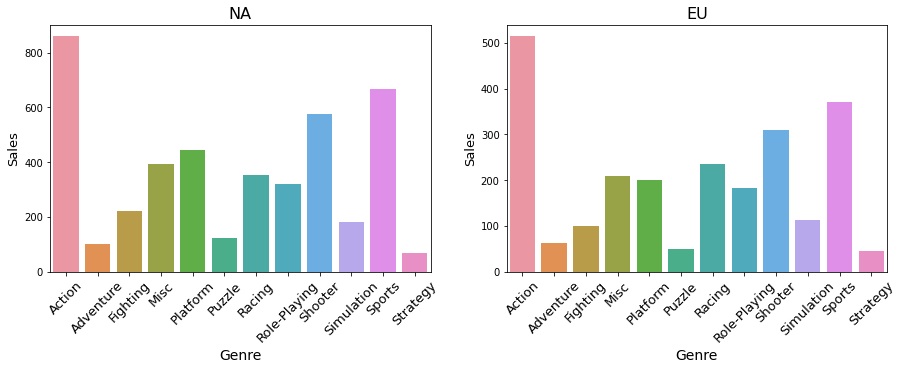

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.barplot(x=df_R1.index, y=df_R1['NA_Sales'])
plt.title('NA', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Sales', fontsize=13)
plt.xticks(rotation= 45, fontsize = 13)
plt.subplot(222)
sns.barplot(x=df_R1.index, y=df_R1['EU_Sales'])
plt.title('EU', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Sales', fontsize=13)
plt.xticks(rotation= 45, fontsize = 13)

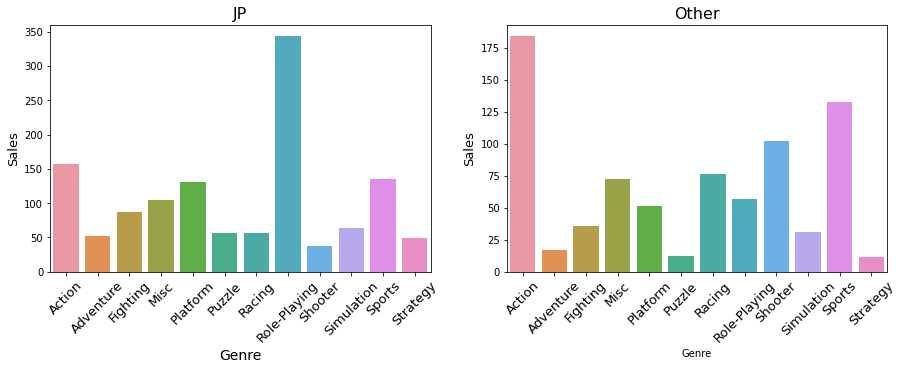

In [53]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.barplot(x=df_R1.index, y=df_R1['JP_Sales'])
plt.title('JP', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Sales', fontsize=13)
plt.xticks(rotation= 45, fontsize = 13)
plt.subplot(222)
sns.barplot(x=df_R1.index, y=df_R1['Other_Sales'])
plt.title('Other', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Sales', fontsize=13)
plt.xticks(rotation= 45, fontsize = 13)
plt.show()

In [79]:
from scipy.stats import chi2_contingency

### 지역별 선호하는 게임의 장르가 있는 것으로 판단.
일본 지역이 Role-Playing의 장르가 판매량이 두드러지는데, 일본은 JRPG라는 롤플레잉 장르가 따로 있을 정도로 패밀리컴-슈퍼패밀리컴시대에 가장 성행했다고 알려져있다. 

## ◎ 연도별 게임의 트렌드가 있을까

In [55]:
df['ALL_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

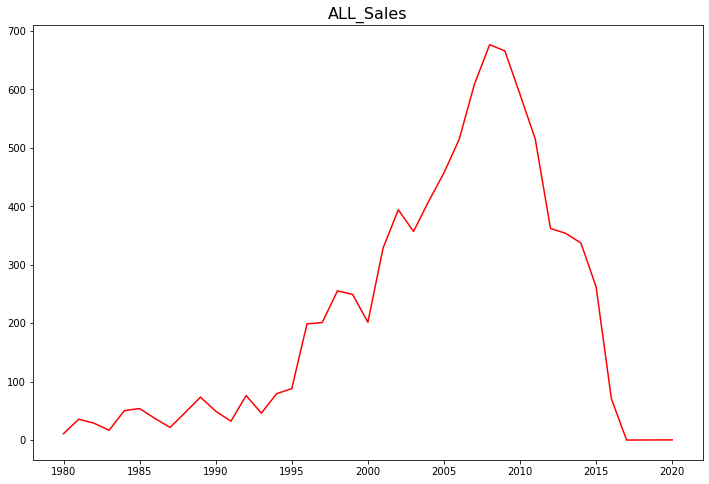

In [58]:
# 연도별 총 출고량
plt.figure(figsize=(12, 8))
plt.plot(df.groupby('Year')['ALL_Sales'].sum(), color='red')
plt.title('ALL_Sales', fontsize=16)
plt.show()

#### 전체 출고량이 2000년대부터 급상승하다가 2005년~2010년 사이 최고점을 찍고 이후 급하강하여 비디오 게임 산업이 주춤하는 것으로 생각.

Text(0.5, 1.0, '1980s Sales Ratio')

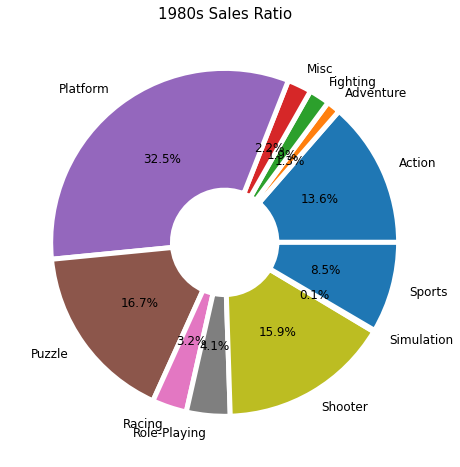

In [74]:
# 1980s 장르별 총 출고량
plt.figure(figsize=(8,8))
ratio_1 = df[df['Year']<1990].groupby('Genre')['ALL_Sales'].sum()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio_1, labels=ratio_1.index,  autopct='%.1f%%', textprops=({'size':12}), wedgeprops=wedgeprops)
plt.title('1980s Sales Ratio', fontsize=15)

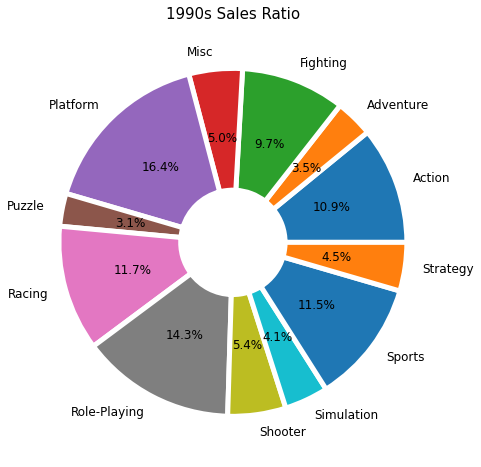

In [75]:
#1990s 장르별 총 출고량
plt.figure(figsize=(8,8))
ratio_2 = df[(df['Year']>=1990)&(df['Year']<2000)].groupby('Genre')['ALL_Sales'].sum()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio_2, labels=ratio_2.index,  autopct='%.1f%%', textprops=({'size':12}), wedgeprops=wedgeprops)
plt.title('1990s Sales Ratio', fontsize=15)
plt.show()

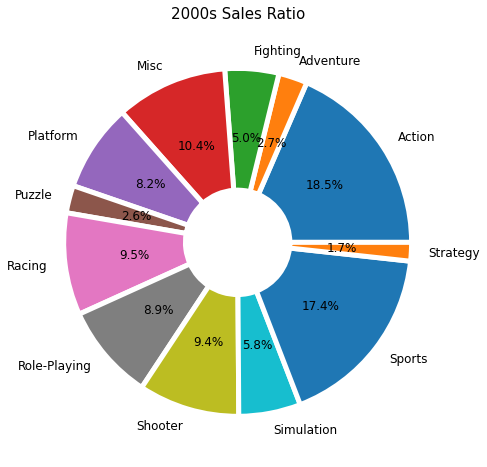

In [76]:
#2000s 장르별 총 출고량
plt.figure(figsize=(8,8))
ratio_3 = df[(df['Year']>=2000)&(df['Year']<2010)].groupby('Genre')['ALL_Sales'].sum()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio_3, labels=ratio_3.index,  autopct='%.1f%%', textprops=({'size':12}), wedgeprops=wedgeprops)
plt.title('2000s Sales Ratio', fontsize=15)
plt.show()

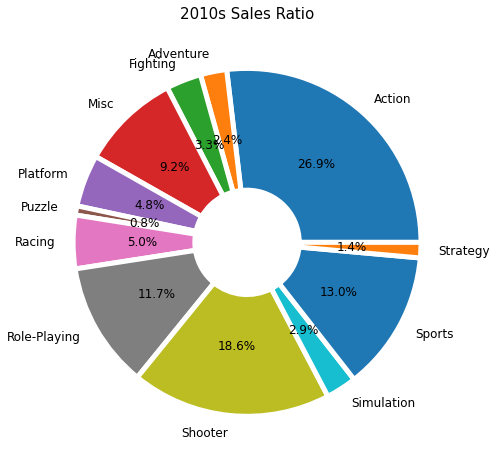

In [77]:
#2010s 장르별 총 출고량
plt.figure(figsize=(8,8))
ratio_4 = df[(df['Year']>=2010)&(df['Year']<=2020)].groupby('Genre')['ALL_Sales'].sum()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio_4, labels=ratio_4.index,  autopct='%.1f%%', textprops=({'size':12}), wedgeprops=wedgeprops)
plt.title('2010s Sales Ratio', fontsize=15)
plt.show()

- 1980년대에는 platform 장르에서 32.5%의 높은 출고율을 보이고 있다.
- 1990년대에는 1980년대에 비해 평준화된 출고율을 보여주고 있다.
- 2000년대에는 Action과 Sports에서 높은 출고율을 보이고 있다.
- 2010년대에는 Action의 출고율이 보다 두드러지며, Shooter의 출고율이 증가함을 보이고 있다.


#### 카이제곱 검정을 통해 독립성 검정을 시행해보겠다.
- H0 : 연도별 게임장르의 트렌드는 변하지 않는다.
- H1 : 연도별 게임장르의 트렌드는 변한다.

In [82]:
df_crosstab = pd.crosstab(df.Genre, df.Year)
chi2_contingency(df_crosstab)[0:2]

(2763.3426220442343, 0.0)

독립성 시행 결과, p-value 값이 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택하게 된다.

따라서, 연도별 장르의 트렌드는 변한다고 볼 수 있다.

## 연도별 플랫폼에 따른 트렌드 변화

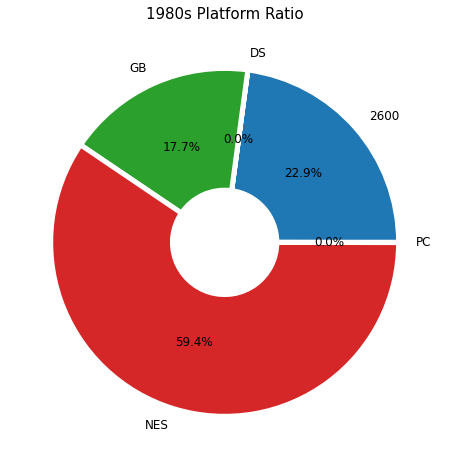

In [83]:
plt.figure(figsize=(8,8))
ratio_80 = df[df['Year'] < 1990].groupby('Platform')['ALL_Sales'].sum()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio_80, labels=ratio_80.index,  autopct='%.1f%%', textprops=({'size':12}), wedgeprops=wedgeprops)
plt.title('1980s Platform Ratio', fontsize=15)
plt.show()

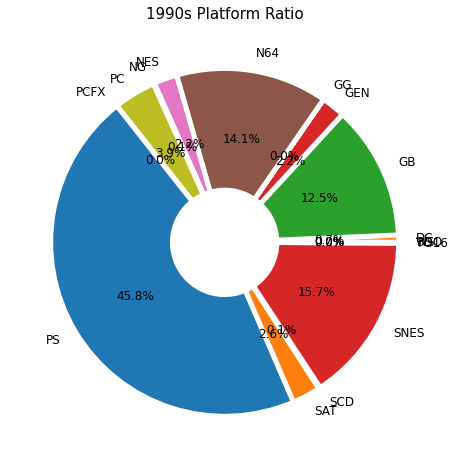

In [84]:
plt.figure(figsize=(8,8))
ratio_90 = df[(df['Year'] >= 1990)&(df['Year']<2000)].groupby('Platform')['ALL_Sales'].sum()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio_90, labels=ratio_90.index,  autopct='%.1f%%', textprops=({'size':12}), wedgeprops=wedgeprops)
plt.title('1990s Platform Ratio', fontsize=15)
plt.show()

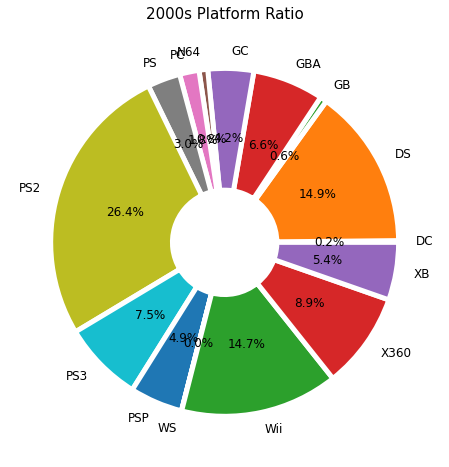

In [85]:
plt.figure(figsize=(8,8))
ratio_00 = df[(df['Year'] >= 2000)&(df['Year']<2010)].groupby('Platform')['ALL_Sales'].sum()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio_00, labels=ratio_00.index,  autopct='%.1f%%', textprops=({'size':12}), wedgeprops=wedgeprops)
plt.title('2000s Platform Ratio', fontsize=15)
plt.show()

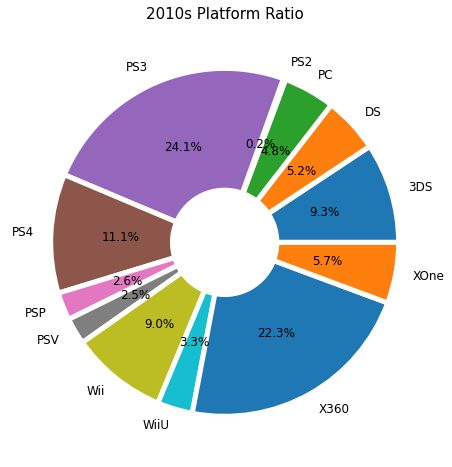

In [86]:
plt.figure(figsize=(8,8))
ratio_10 = df[(df['Year'] >= 2010)&(df['Year']<=2020)].groupby('Platform')['ALL_Sales'].sum()
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio_10, labels=ratio_10.index,  autopct='%.1f%%', textprops=({'size':12}), wedgeprops=wedgeprops)
plt.title('2010s Platform Ratio', fontsize=15)
plt.show()

-1980년대에는 4개의 플랫폼만이 존재하고 NES사가 60%에 가까운 비율을 차지하고 있다.
-1990년대에는 1980년대에 비해 3배 이상의 플랫폼이 등장했으며, PS 플랫폼이 45%로 가장 많은 비율을 차지하고 있다.
-2000년대에는 PS2, DS, Wii 순서로 많은 비율을 차지하고 있다.
-2010년대에는 PS3, X360이 비슷한 비율로 많은 둘이 합쳐서 45%의 비율을 차지하고 있고 같은 계열사의 플랫폼이 주를 이루고 있다.

#### 연도별 플랫폼에 트렌드가 있는지에 대한 카이제곱검정

- H0 : 연도별 플랫폼 판매량에 변화가 없다.
- H1 : 연도별 플랫폼 판매량에 변화가 있다.

In [87]:
df_platform = pd.crosstab(df.Platform, df.Year)
chi2_contingency(df_platform)[0:2]

(75003.49964249204, 0.0)

p-value값이 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택할 수 있다.
연도별 플랫폼의 트렌드는 변한다고 볼 수 있다.

## ◎출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [98]:
# 총 출고량이 Top100인 데이터 출력
df = df.sort_values(by='ALL_Sales', ascending=False)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
6864,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
126,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9286,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
10645,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
914,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
7970,Theatre Of War,PC,2007,Strategy,Kalypso Media,0.00,0.01,0.00,0.00,0.01
7967,Pro Evolution Soccer 2008,PC,2007,Sports,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
11530,FairlyLife: MiracleDays,PSP,2010,Adventure,Piacci,0.00,0.00,0.01,0.00,0.01
13535,Koi Sentai Love & Peace the P.S.P: Power Zenka...,PSP,2012,Action,Broccoli,0.00,0.00,0.01,0.00,0.01


In [99]:
df_100 =  df.head(100)
df_100

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
6864,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
126,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9286,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
10645,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
914,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
14752,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44
9301,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.00,0.69,7.38
12601,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
6201,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.32


In [100]:
df_100 = df_100.reset_index(drop=True)
df_100.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38


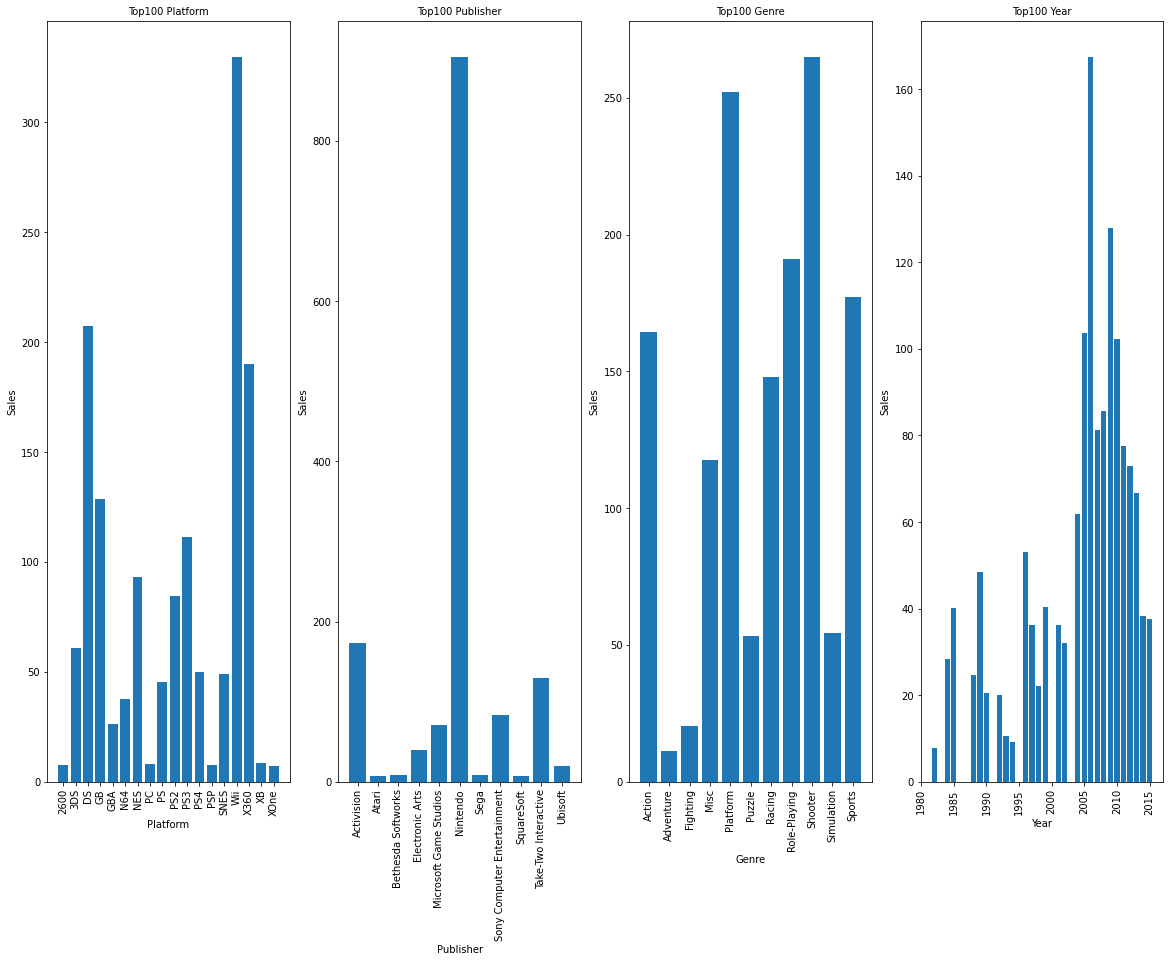

In [104]:
# 출고량 top100인 데이터에 대해 플랫폼, 퍼블리셔, 장르, 연도별 판매량 집계
plt.figure(figsize = (20,14))
plt.subplot(1, 4, 1)
plt.bar(df_100.groupby('Platform').sum().index, df_100.groupby('Platform').sum()['ALL_Sales'])
plt.title('Top100 Platform',fontsize=10)
plt.xticks(rotation='vertical',fontsize=10)
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.subplot(1, 4, 2)
plt.bar(df_100.groupby('Publisher').sum().index, df_100.groupby('Publisher').sum()['ALL_Sales'])
plt.title('Top100 Publisher',fontsize=10)
plt.xticks(rotation='vertical',fontsize=10)
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.subplot(1, 4, 3)
plt.bar(df_100.groupby('Genre').sum().index, df_100.groupby('Genre').sum()['ALL_Sales'])
plt.title('Top100 Genre', fontsize=10)
plt.xticks(rotation='vertical', fontsize=10)
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.subplot(1, 4, 4)
plt.bar(df_100.groupby('Year').sum().index, df_100.groupby('Year').sum()['ALL_Sales'])
plt.title('Top100 Year', fontsize=10)
plt.xticks(rotation='vertical', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

- 전체 출고량에 따른 플랫폼, 퍼블리셔, 장르, 연도의 판매량을 나타냈다.
- Platform : Wii가 압도적으로 높은 판매량을 보인다.
- Publisher : Nintendo가 압도적인 판매량을 보인다.
- Genre : Shooter, platform 순의 판매량이 나타난다.
- Year : 2006~2007년도에 압도적인 판매량을 보인다.


In [108]:
df_genre = df_100.groupby('Genre').sum()
df_genre.drop(['Year'], axis='columns', inplace=True)
df_genre.reset_index(inplace=True)
df_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,ALL_Sales
0,Action,73.08,52.38,9.53,29.23,164.22
1,Adventure,6.16,2.04,2.69,0.29,11.18
2,Fighting,9.99,3.96,5.08,1.45,20.48
3,Misc,59.49,36.45,10.92,10.62,117.48
4,Platform,138.08,54.82,46.64,12.40,251.94
5,Puzzle,33.92,8.07,9.54,1.84,53.37
6,Racing,60.21,44.81,24.64,18.28,147.94
7,Role-Playing,71.74,50.59,59.41,9.34,191.08
8,Shooter,160.14,74.37,4.43,25.94,264.88
9,Simulation,14.61,23.26,11.62,4.75,54.24


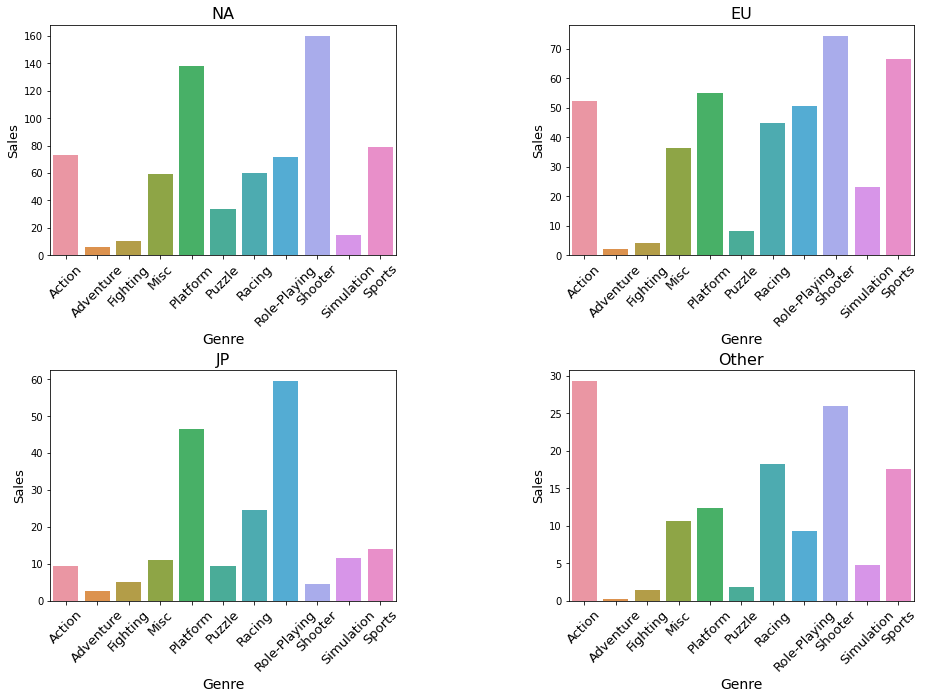

In [116]:
# 각 지역별 Genre 판매량 barplot
plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.barplot(x='Genre', y='NA_Sales', data=df_genre)
plt.title('NA', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Sales', fontsize=13)
plt.xticks(rotation= 45, fontsize = 13)
plt.subplot(222)
sns.barplot(x='Genre', y='EU_Sales', data=df_genre)
plt.title('EU', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Sales', fontsize=13)
plt.xticks(rotation= 45, fontsize = 13)
plt.subplot(223)
sns.barplot(x='Genre', y='JP_Sales', data=df_genre)
plt.title('JP', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Sales', fontsize=13)
plt.xticks(rotation= 45, fontsize = 13)
plt.subplot(224)
sns.barplot(x='Genre', y='Other_Sales', data=df_genre)
plt.title('Other', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Sales', fontsize=13)
plt.xticks(rotation= 45, fontsize = 13)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
plt.show()

- 북미와 유렵에서는 Shooter의 판매량이 두드러지게 나타났으며, 일본에서는 롤플레잉, 이외 지역에서는 액션장르의 판매량이 두드러지게 나타났음.

- 결론
북미와 유럽 : 닌텐도 회사의 wii 플랫폼을 활용한 Shooter게임을 발매하는 것을 추천
일본 : 일본에서는 닌텐도 회사에서 wii 플랫폼을 활용한 Role-Playing 게임을,
그 외 지역 : 닌텐도 회사에서 wii 플랫폼을 활용한 Action 게임을 발매하는 것을 추천.